# Rode wijn in Portugal

Voor de Data Science casusopdracht heeft onze groep de rode wijn data set als onderzoekopdracht. In het eerste gedeelte van dit document zal er een een verkenning van de data plaatsvinden, waardoor er gerichte en interessante onderzoeksvragen opgesteld kunnen worden.

## Verkenning

Als eerste stap van de verkenning zal er onderzoek gedaan worden naar de huidige velden en de mogelijke verbeteringen aan de data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
redwine = pd.read_csv('redwine.csv', sep=';')
redwine.head()

,id,country,description,designation,points,price,province,taster_name,title,variety,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Kerin OKeefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,...,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
1,2,Portugal,"From an estate in the south of the Alentejo, t...",Grande Reserva Tinto,91,26.0,Alentejano,Roger Voss,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Portuguese Red,...,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
2,3,Portugal,A year in wood and 30 months in bottle before ...,Montes Claros Garrafeira,90,28.0,Alentejo,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
3,4,Portugal,Wood aging gives this ripe blend of Baga and T...,NaN,90,20.0,Beira Atlantico,Alexander Peartree,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,5,Portugal,"A powerful wine, richly structured and full of...",Gerações Colheita Seleccionada,92,34.0,Alentejano,Paul Gregutt,Herdade Grande 2010 Gerações Colheita Seleccio...,Portuguese Red,...,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4


In [3]:
redwine.set_index('id', inplace=True)

In [4]:
# Eerst eens bekijken hoeveel records we op dit moment hebben
len(redwine)

2465

In [5]:
# Bekijken hoeveel records het scheelt met ontbrekende waardes
len(redwine.dropna())

2064

Hier zit best een fors verschil tussen, waardoor er met meer detail naar de data gekeken moet worden.

Daarnaast valt het ons op dat de country en variety velden allemaal gelijke data bevatten, waardoor deze irrelevant zijn.

In [6]:
redwine.drop(['country', 'variety'], axis=1, inplace=True)
redwine.head()

,description,designation,points,price,province,taster_name,title,winery,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
id,,,,,,,,,,,,,,,,,,,
1,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Kerin OKeefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,10.0,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
2,"From an estate in the south of the Alentejo, t...",Grande Reserva Tinto,91,26.0,Alentejano,Roger Voss,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Casa Santa Vitória,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
3,A year in wood and 30 months in bottle before ...,Montes Claros Garrafeira,90,28.0,Alentejo,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,Adega Cooperativa de Borba,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,Wood aging gives this ripe blend of Baga and T...,NaN,90,20.0,Beira Atlantico,Alexander Peartree,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Quinta de Foz de Arouce,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
5,"A powerful wine, richly structured and full of...",Gerações Colheita Seleccionada,92,34.0,Alentejano,Paul Gregutt,Herdade Grande 2010 Gerações Colheita Seleccio...,Herdade Grande,8.0,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4


Hieronder tellen we het aantal rijen met missende data per kolom.

In [7]:
redwine.isna().sum()

description               0
designation             153
points                    0
price                   269
province                  0
taster_name               0
title                     0
winery                    0
fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
dtype: int64

Het valt op dat alle missende data voorkomt bij designation en price, echter zijn er ook een aantal kolommen die niet het goede type zijn. Deze zullen zeer waarschijnlijk dus ook data bevatten die niet als float gecast kan worden.

In [8]:
redwine.dtypes

description              object
designation              object
points                    int64
price                   float64
province                 object
taster_name              object
title                    object
winery                   object
fixed acidity           float64
volatile acidity        float64
citric acid              object
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                  object
pH                      float64
sulphates               float64
alcohol                  object
dtype: object

In [9]:
redwine[np.isnan(pd.to_numeric(redwine["density"], errors="coerce"))]

,description,designation,points,price,province,taster_name,title,winery,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
id,,,,,,,,,,,,,,,,,,,
1475,"With David Baverstock, winemaker for Herdade d...",Sonhador,90,25.0,Alentejano,Michael Schachner,Howard's Folly 2011 Sonhador Red (Alentejano),Howard's Folly,13.0,0.47,0.49,4.3,0.085,6.0,47.0,.,3.3,0.68,12.7


Hieruit blijkt dat er maar 1 rij is waar de density niet klopt, omdat het er maar 1 is, zullen we deze verwijderen uit de dataset.

In [10]:
redwine.drop(1475, inplace=True)
redwine["density"] = redwine["density"].astype("float")

De andere velden met het type object bevatten meer invalide waardes:

In [11]:
print(len(redwine[np.isnan(pd.to_numeric(redwine["citric acid"], errors="coerce"))]))
print(len(redwine[np.isnan(pd.to_numeric(redwine["alcohol"], errors="coerce"))]))

203
10


Omdat het bij alcohol ook om maar een aantal waardes gaat, is er gekozen om ook voor de records met ongeldige alcohol waardes de records te verwijderen.

In [12]:
redwine = redwine[~np.isnan(pd.to_numeric(redwine["alcohol"], errors="coerce"))]
redwine["alcohol"] = redwine["alcohol"].astype("float")

### Tweede dataset

Als tweede dataset is er een set gepakt welke ook de zelfde chemische samenstellingen bevat als de huidige set, alleen is deze gericht op witte wijnen. 

In [13]:
whitewine = pd.read_csv('winequality-white.csv', sep=';')
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In tegenstelling tot bij de rode wijn, is er niet veel informatie over de regio en naamgeving van de wijn beschikbaar. Daarnaast is het een kwaliteitscijfer en niet een waardering van een reviewer, waardoor de cijfers niet direct te vergelijken zijn.

Bij de witte wijn set worden alle kolommen wel correct ingelezen:

In [14]:
whitewine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


#### Histogrammen

Om meer inzicht te krijgen in de verdelingen van de stoffen, is voor elke stof een histogram opegsteld. Ook voor de pH, quality en alcohol waardes zijn grafieken gemaakt.

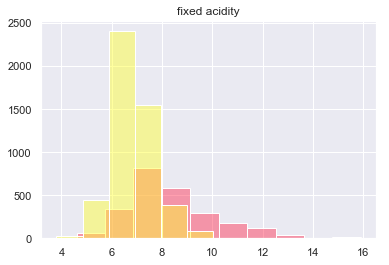

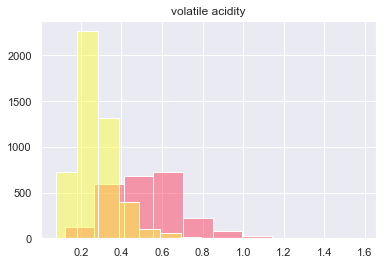

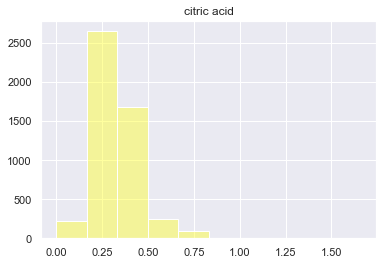

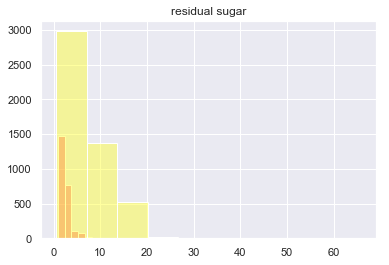

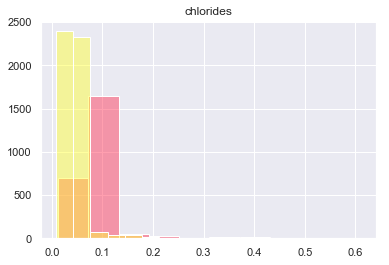

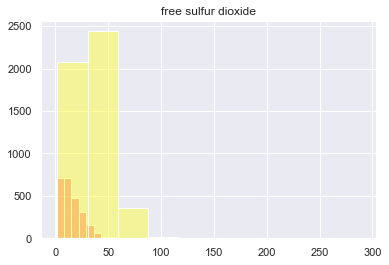

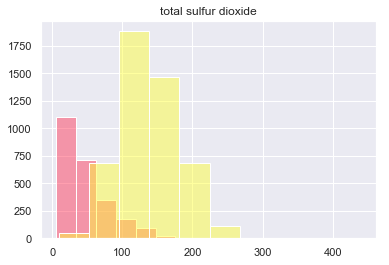

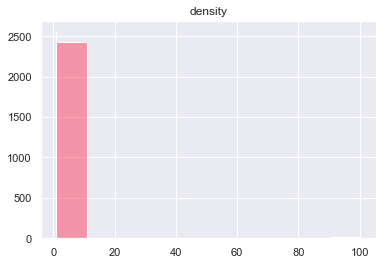

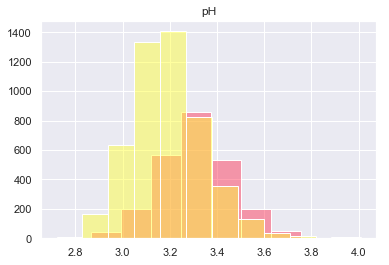

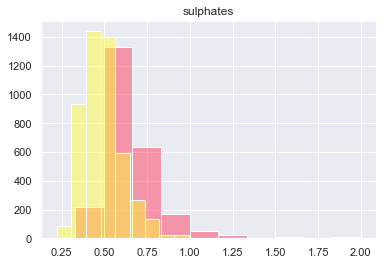

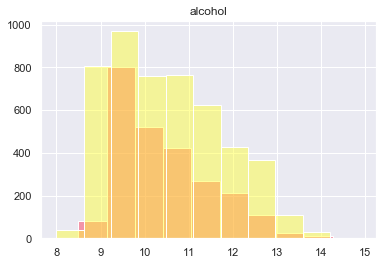

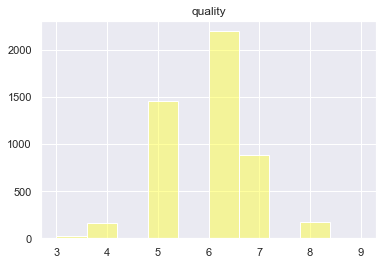

In [15]:
sns.set()
for column in whitewine.columns.values:
    plt.title(column)
    if column in redwine:
        if redwine[column].dtype != "object":
            plt.hist(redwine[column], color="#ff335577")
    plt.hist(whitewine[column], color="#ffff3377")
    plt.show()

Het valt hierbij op dat de quality en citric acid geen rode wijnen heeft, omdat de quality niet aanwezig is als veld in de dataset, en omdat citric acid van het type object is. In tegenstelling tot alcohol en density is hier nog geen oplossing voor, omdat er veel meer datapunten missen.

Daarnaast is het interessant om te zien dat veel van deze grafieken geen goeie normaalverdeling vormen, wat doet vermoeden dat er een directe aanleiding is voor de verdeling van de stoffen. De grafiek van de pH waardes lijkt nog het meest normaal verdeeld.

## Onderzoeksvragen

Een eis voor het voltooien van deze casus is het opstellen (en beantwoorden) van onderzoeksvragen. Hierbij moet er rekening gehouden worden met de data die is aangeleverd en moet er een combinatie gemaakt worden met een externe set van data.

In het vorige gedeelte is een externe set verkend, welke betrekking heeft op witte wijnen in plaats van rode.

Met deze twee datasets en alle gegevens erin zijn we tot de volgende onderzoeksvragen gekomen:

- Welke proefpersonen geven gemiddeld meer of minder punten voor een wijn en hoeveel is dit?
- Zijn er groepen te onderscheiden in de wijn op basis van de stoffen en de wijnmakerijen?
- In hoeverre is de score van een Portugese Red te voorspellen op basis van de chemische kenmerken?
- Wat zijn de verschillen in verhoudingen van de chemische kenmerken bij rode t.o.v. witte wijnen?


## Onderzoeksvraag 1

Deze onderzoeksvraag luidt: "Welke proefpersonen geven gemiddeld meer of minder punten voor een wijn en hoeveel is dit?"

Door deze vraag te beantwoorden kan er gekeken worden of alle wijnen even eerlijk beoordeeld worden. Mocht er dan een vergelijking gaan komen tussen de verschillende wijnen waarbij het aantal punten een rol speelt kan er rekening mee gehouden worden.

Als eerste zullen we bekijken hoeveel reviewers er in totaal zijn en wat hun gemiddelde scores zijn:

In [16]:
redwine['taster_name'].astype(str)
redwine_grouped = redwine.groupby(['taster_name'])[['taster_name', 'points']]
display(redwine_grouped.mean())

,points
taster_name,
Alexander Peartree,88.500000
Anna Lee C. Iijima,88.892857
Anne Krebiehl MW,88.090909
Carrie Dykes,85.333333
Fiona Adams,88.666667
Jeff Jenssen,87.111111
Jim Gordon,88.679245
Joe Czerwinski,88.650350
Kerin OKeefe,88.740310


Hierboven zijn de gemiddelden per reviewer te zien.
Hierin valt op dat de gemiddelden allemaal binnen 5 punten van elkaar liggen.
Een verschil van een gemiddelde van 5 op een totaal van zo te zien 100 punten is niet genoeg om te zeggen dat er één of meerdere personen daadwerkelijk een andere waardering geven ten opzichte van de rest. Hieruit is voor deze deelvraag dus nog niks af te leiden.

Om er toch dieper op in te duiken zal er hieronder een histogram worden opgesteld voor elk proefpersoon. Hiermee kunnen we kijken of er ook echt uitschieters gegeven worden. Eventueel is er dan verder mee te onderzoeken of de lage(re) of hoge(re) scores zich allemaal bij bepaalde wijnen bevinden.

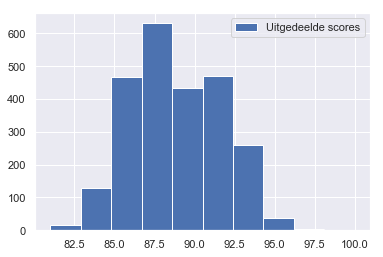

In [17]:
plt.hist(redwine['points'], label='Uitgedeelde scores')
plt.legend()
plt.show()

Hierboven is te zien dat, zoals ook al af te leiden uit de gemiddelden hierboven, de meeste scores tussen de 85 en 90 zijn gegeven. 
Er ontstaat hier dan ook een mooie normaalverdeling in de uitgegedeelde punten.

In [18]:
display('Aantal reviews')
display(redwine_grouped.size())

'Aantal reviews'

taster_name
Alexander Peartree     14
Anna Lee C. Iijima     84
Anne Krebiehl MW       55
Carrie Dykes            3
Fiona Adams             3
Jeff Jenssen            9
Jim Gordon            106
Joe Czerwinski        143
Kerin OKeefe         258
Lauren Buzzeo          38
Matt Kettmann         139
Michael Schachner     381
Mike DeSimone           5
Paul Gregutt          216
Roger Voss            628
Sean P. Sullivan      125
Susan Kostrzewa        29
Virginie Boone        218
dtype: int64

Hierboven is per reviewer te zien hoeveel punten er daadwerkelijk uitgedeeld zijn. Hieruit is dus af te leiden of en persoon ook genoeg scores heeft uigedeeld heeft om betrouwbaar een gemiddelde vanaf te leiden.

Daarnaast is het interessant om te bekijken of de personen met een minder aantal uitgedeelde punten ook een hogere spreiding hebben in hun uitgedeelde punten.

Op dit moment zal er dus doorgegaan worden op de personen welke in totaal minder als 20 maal een score hebben gegeven.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a181f0dd8>,
      dtype=object)

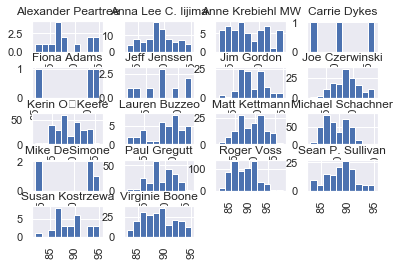

In [19]:
redwine['points'].hist(by=redwine['taster_name'])

## Onderzoeksvraag 2

Voor de tweede onderzoeksvraag zullen er groepen worden gemaakt op basis van de stoffen en de wijnmakerijen. Deze vraag is een clustering onderzoek, waardoor er bij voorbaad geen richtlijnen opgesteld kunnen worden voor een volledige beantwoording van de onderzoeksvraag. 

In [20]:
from sklearn.cluster import KMeans
whitewine_clustering = whitewine

### Experimenten

Allereerst zullen er een aantal experimenten volgen rondom het clusteren van de witte wijn dataset op basis van verschillende eigenschappen.
Hierbij zullen er geen definitieve conclusies getrokken worden, maar ligt de nadruk op het vinden van interessante uitkomsten.
Wel is er soms extra toelichting over wat er te zien is in de verschillende plots.
De uitwerkingen in de clustering paragraaf zijn voorzien van correcte labels en een titel, de diagrammen hieronder dus niet.

In [21]:
means = KMeans(n_clusters=3, random_state=0)
means.fit(whitewine_clustering[["alcohol", "sulphates"]])
means.cluster_centers_

array([[ 9.36144934,  0.49026366],
       [10.77592927,  0.49477991],
       [12.38072115,  0.48060577]])

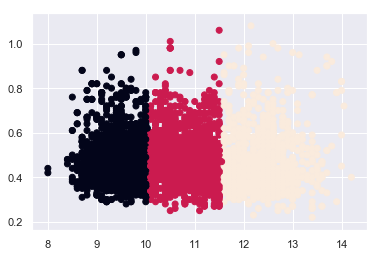

In [22]:
plt.scatter(whitewine_clustering["alcohol"], whitewine_clustering["sulphates"], c=means.labels_)

In dit cluster van drie groepen zijn er duidelijk 3 groepen gemaakt op basis van het alcohol percentage.

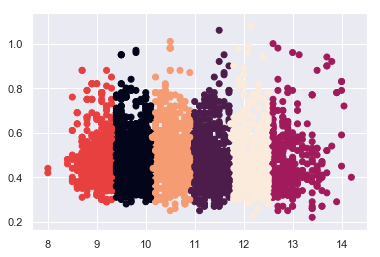

In [23]:
means = KMeans(n_clusters=6, random_state=0)
means.fit(whitewine_clustering[["alcohol", "sulphates"]])
plt.scatter(whitewine_clustering["alcohol"], whitewine_clustering["sulphates"], c=means.labels_)

Wederom lijken de groepen enkel gebaseerd te zijn op het alcohol percentage.

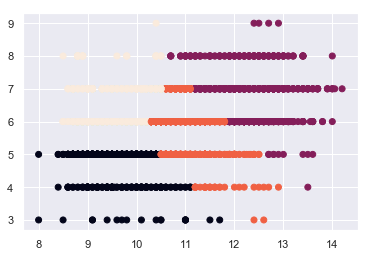

In [24]:
means = KMeans(n_clusters=4, random_state=0)
means.fit(whitewine_clustering[["alcohol", "quality"]])
plt.scatter(whitewine_clustering["alcohol"], whitewine_clustering["quality"], c=means.labels_)

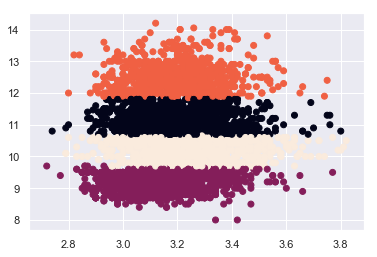

In [25]:
means = KMeans(n_clusters=4, random_state=0)
means.fit(whitewine_clustering[["pH", "alcohol"]])
plt.scatter(whitewine_clustering["pH"], whitewine_clustering["alcohol"], c=means.labels_)

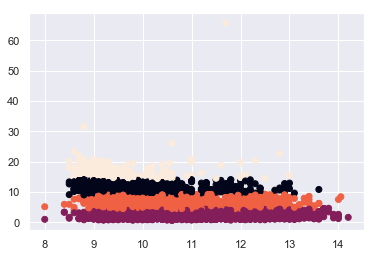

In [26]:
means = KMeans(n_clusters=4, random_state=0)
means.fit(whitewine_clustering[["alcohol", "residual sugar"]])
plt.scatter(whitewine_clustering["alcohol"], whitewine_clustering["residual sugar"], c=means.labels_)

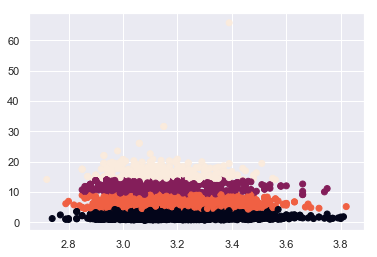

In [27]:
means = KMeans(n_clusters=4, random_state=0)
means.fit(whitewine_clustering[["pH", "residual sugar"]])
plt.scatter(whitewine_clustering["pH"], whitewine_clustering["residual sugar"], c=means.labels_)

In [28]:
whitewine_clustering.groupby(means.labels_).describe()

fixed acidity                                                \
          count      mean       std  min  25%  50%  75%   max   
0        2147.0  6.804960  0.927479  3.9  6.2  6.7  7.3  14.2   
1         874.0  7.005606  0.770235  3.8  6.5  6.9  7.5  11.8   
2        1384.0  6.787283  0.780426  4.2  6.3  6.7  7.2  10.7   
3         493.0  6.993915  0.698258  5.0  6.5  7.0  7.4  10.0   

  volatile acidity           ...  alcohol        quality                      \
             count      mean ...      75%    max   count      mean       std   
0           2147.0  0.268770 ...     11.9  14.20  2147.0  5.960410  0.924865   
1            874.0  0.290755 ...     10.4  13.60   874.0  5.757437  0.823882   
2           1384.0  0.289397 ...     11.4  14.05  1384.0  5.875723  0.869930   
3            493.0  0.265984 ...      9.6  13.00   493.0  5.738337  0.818045   

                            
   min  25%  50%  75%  max  
0  3.0  5.0  6.0  7.0  9.0  
1  3.0  5.0  6.0  6.0  9.0  
2  3.0  5.0  6.0  6.0  8.0  
3  3.0  5.0  6.0  6.0  8.0  

[4 rows x 96 columns]

Uit latere tests is gebleken dat er uitschieters in de data zitten, deze worden hieronder weggehaald uit de dataset:

In [29]:
redwine_clustering = redwine[["points", "fixed acidity", "volatile acidity", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "pH", "sulphates", "alcohol"]]

whitewine_clustering = whitewine_clustering[whitewine_clustering["total sulfur dioxide"] < 200]
redwine_clustering = redwine_clustering[redwine_clustering["total sulfur dioxide"] < 250]

### Clustering

Hieronder zal het belangrijkste gedeelte van de clustering plaatsvinden, waarbij er gezocht zal worden naar een aantal groepen tussen de 3 en 5.
Voor elk van deze clustering uitkomsten zal worden onderzocht of er logische groepen ontstaan en of deze te herleiden zijn naar bepaalde eigenschappen. Dit zal zowel voor de rode als de witte wijn data set uitgevoerd worden.

In [30]:
three_group_white_cluster = KMeans(n_clusters=3, random_state=0)
three_group_white_cluster.fit(whitewine_clustering)
whitewine_clustering.groupby(three_group_white_cluster.labels_).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.944385,0.279721,0.352452,8.296711,0.050544,45.341860,170.301329,0.995527,3.189708,0.502578,9.979502,5.730233
1,6.787768,0.273434,0.325257,5.759208,0.043663,31.630353,126.010974,0.993446,3.192827,0.482682,10.747857,6.020878
2,6.794265,0.273320,0.316532,3.610349,0.040504,21.338710,85.681004,0.991983,3.182330,0.474095,11.198865,5.973118


Hierbij valt op dat er voornamelijk verschillen tussen de groepen zitten voor de residual sugar, free sulfur dioxide, total sulfur dioxide en alchohol.

In [31]:
four_group_white_cluster = KMeans(n_clusters=4, random_state=0)
four_group_white_cluster.fit(whitewine_clustering)
whitewine_clustering.groupby(four_group_white_cluster.labels_).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.816854,0.280042,0.315815,3.454073,0.040243,18.750000,77.404494,0.991849,3.175478,0.468441,11.244078,5.894663
1,6.774403,0.269397,0.323011,4.711141,0.041790,28.279841,112.860411,0.992757,3.191505,0.484735,10.969131,6.075597
2,6.963136,0.284267,0.353442,8.885336,0.051264,47.895112,178.473014,0.995925,3.183086,0.506507,9.835014,5.636456
3,6.842308,0.273497,0.335843,6.981197,0.047257,37.381507,145.101787,0.994411,3.198656,0.485796,10.403157,5.938617


Bij het clusteren in vier groepen valt op dat de grote verschillen wederom bij deze eigenschappen te vinden zijn.

In [32]:
five_group_white_cluster = KMeans(n_clusters=5, random_state=0)
five_group_white_cluster.fit(whitewine_clustering)
whitewine_clustering.groupby(five_group_white_cluster.labels_).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.893625,0.275071,0.342902,7.360609,0.048518,39.784967,153.563273,0.994793,3.192969,0.488040,10.236644,5.885823
1,6.748678,0.266063,0.318648,4.134329,0.041424,26.146915,100.188051,0.992264,3.195152,0.478844,11.159207,6.089128
2,6.833017,0.282138,0.312447,3.190499,0.039171,15.564133,68.669834,0.991772,3.169192,0.469074,11.212431,5.748219
3,6.949231,0.283532,0.353205,9.098333,0.051409,49.858974,181.705769,0.996056,3.186321,0.511423,9.792372,5.594872
4,6.809663,0.276394,0.327714,5.655304,0.043550,30.581003,125.809622,0.993412,3.189613,0.484293,10.759320,6.044408


Bij vijf groepen is dit niet anders. Dat de grootste verschillen zitten in deze velden, blijkt voor het 2e, 3e en 4e genoemde element zelfs hetzelfde te zijn voor de rode wijn:

In [33]:
three_group_red_cluster = KMeans(n_clusters=3, random_state=0)
three_group_red_cluster.fit(redwine_clustering)
redwine_clustering.groupby(three_group_red_cluster.labels_).mean()

,points,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,89.222896,8.512964,0.519712,2.400796,0.083967,9.403336,23.580743,3.312547,0.648954,10.599697
1,88.730515,8.257992,0.517992,2.484808,0.093107,21.834214,57.116248,3.321387,0.682272,10.336328
2,87.473404,7.955851,0.576436,3.242154,0.088795,26.037234,108.558511,3.289761,0.657394,9.899734


In [34]:
four_group_red_cluster = KMeans(n_clusters=4, random_state=0)
four_group_red_cluster.fit(redwine_clustering)
redwine_clustering.groupby(four_group_red_cluster.labels_).mean()

,points,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,88.987838,8.211757,0.523574,2.392297,0.088564,18.268243,45.271622,3.335784,0.668054,10.435946
1,87.158140,8.073488,0.548628,3.187442,0.088349,28.348837,122.344186,3.244558,0.688744,9.847442
2,88.226545,8.133638,0.557105,2.841762,0.095517,23.988558,77.324943,3.325835,0.653982,10.103661
3,89.244340,8.589057,0.514627,2.423821,0.083348,8.136792,20.341509,3.302868,0.652264,10.634717


In [35]:
five_group_red_cluster = KMeans(n_clusters=5, random_state=0)
five_group_red_cluster.fit(redwine_clustering)
redwine_clustering.groupby(five_group_red_cluster.labels_).mean()

,points,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,89.357778,8.671889,0.508400,2.463667,0.083313,7.436667,18.498889,3.299011,0.660067,10.664444
1,87.911765,7.874265,0.586563,3.134007,0.089426,22.746324,94.698529,3.312132,0.632316,9.998529
2,88.962373,8.194645,0.529479,2.392981,0.086298,15.272793,38.887120,3.333603,0.643849,10.452967
3,86.858268,8.096063,0.563307,3.372441,0.090315,31.645669,133.188976,3.246299,0.723701,9.732283
4,88.541126,8.298918,0.519145,2.413636,0.095701,24.391775,62.694805,3.321818,0.685649,10.284199


Hieruit blijkt dat KMeans voor deze wijn datasets voornamelijk het onderscheid maakt op basis van de sulfur dioxide, en daarnaast gedeeltelijk op basis van alcohol en residual sugar. Om te visualiseren hoe groot de verschillen tussen de groepen zijn, zullen hieronder verschillende diagrammen volgen.

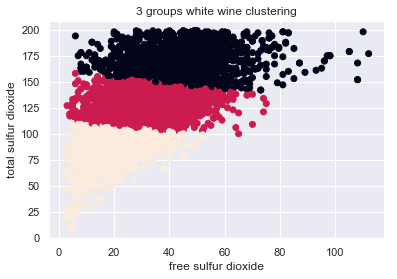

In [36]:
plt.title("3 groups white wine clustering")
plt.xlabel("free sulfur dioxide")
plt.ylabel("total sulfur dioxide")
plt.scatter(whitewine_clustering["free sulfur dioxide"], whitewine_clustering["total sulfur dioxide"], c=three_group_white_cluster.labels_)

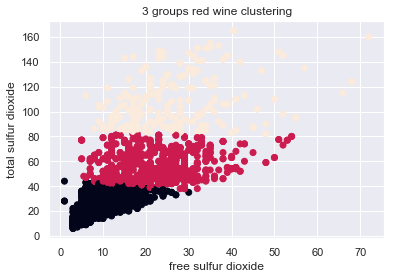

In [37]:
plt.title("3 groups red wine clustering")
plt.xlabel("free sulfur dioxide")
plt.ylabel("total sulfur dioxide")
plt.scatter(redwine_clustering["free sulfur dioxide"], redwine_clustering["total sulfur dioxide"], c=three_group_red_cluster.labels_)

Het is hierbij leuk om te vermelden dat er redelijk vergelijkbare figuren en groepen voortkomen uit beide datasets. Hieronder zijn beide plots weergegeven met dezelfde assen:

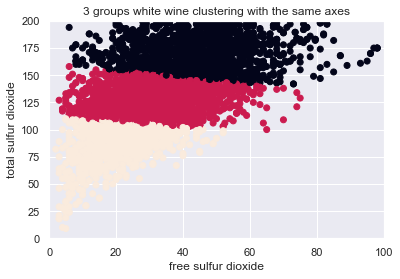

In [38]:
plt.title("3 groups white wine clustering with the same axes")
plt.ylim(0, 200)
plt.xlim(0, 100)
plt.xlabel("free sulfur dioxide")
plt.ylabel("total sulfur dioxide")
plt.scatter(whitewine_clustering["free sulfur dioxide"], whitewine_clustering["total sulfur dioxide"], c=three_group_white_cluster.labels_)

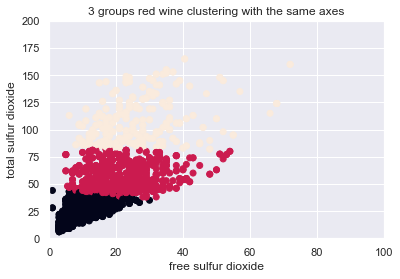

In [39]:
plt.title("3 groups red wine clustering with the same axes")
plt.ylim(0, 200)
plt.xlim(0, 100)
plt.xlabel("free sulfur dioxide")
plt.ylabel("total sulfur dioxide")
plt.scatter(redwine_clustering["free sulfur dioxide"], redwine_clustering["total sulfur dioxide"], c=three_group_red_cluster.labels_)

Door deze grafieken met elkaar te vergelijken, is duidelijk te concluderen dat rode wijn over het algemeen veel minder sulfur dioxide bevat. Dit blijkt ook uit de gemiddelde waardes voor beide tabellen:

In [40]:
redwine_clustering.mean()

points                  88.802610
fixed acidity            8.348817
volatile acidity         0.527879
residual sugar           2.555750
chlorides                0.087529
free sulfur dioxide     15.791803
total sulfur dioxide    46.964927
pH                       3.311782
sulphates                0.660534
alcohol                 10.411052
dtype: float64

In [41]:
whitewine_clustering.mean()

fixed acidity             6.841891
volatile acidity          0.275513
citric acid               0.332205
residual sugar            6.075718
chlorides                 0.045184
free sulfur dioxide      33.668746
total sulfur dioxide    130.833593
density                   0.993780
pH                        3.189171
sulphates                 0.487218
alcohol                  10.602379
quality                   5.911562
dtype: float64

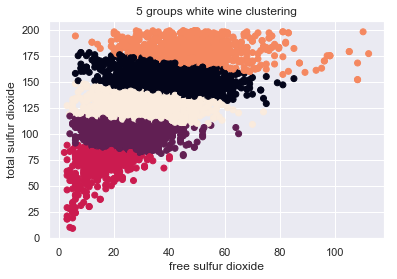

In [42]:
plt.title("5 groups white wine clustering")
plt.xlabel("free sulfur dioxide")
plt.ylabel("total sulfur dioxide")
plt.scatter(whitewine_clustering["free sulfur dioxide"], whitewine_clustering["total sulfur dioxide"], c=five_group_white_cluster.labels_)

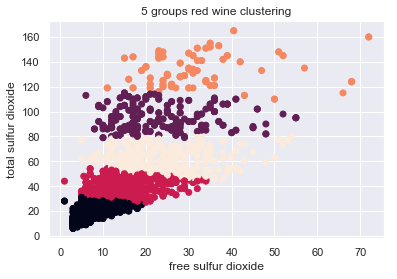

In [43]:
plt.title("5 groups red wine clustering")
plt.xlabel("free sulfur dioxide")
plt.ylabel("total sulfur dioxide")
plt.scatter(redwine_clustering["free sulfur dioxide"], redwine_clustering["total sulfur dioxide"], c=five_group_red_cluster.labels_)

Ook met 5 groepen valt duidelijk te zien dat de verdeling voornamelijk gebaseerd is op de totale hoeveelheid sulfur dioxide. Dit roept meteen de vraag op waarom er dan een zichtbaar verschil zat tussen de alcohol percentages. Om deze vraag te beantwoorden zal er gekeken worden naar de verhouding en relatie tussen sulfur dioxide en alcohol.

### Alcohol vs. sulfur dioxide

In dit laatste onderdeel van de tweede deelvraag zal er onderzoek gedaan worden naar de relatie van deze stoffen, omdat dit de stoffen waarom die de meeste invloed hadden op de groepsverdeling.

(array([ 79., 292., 199., 224., 201., 134., 116.,  57.,  14.,   3.]),
 array([ 8.7 ,  9.23,  9.76, 10.29, 10.82, 11.35, 11.88, 12.41, 12.94,
        13.47, 14.  ]),
 <a list of 10 Patch objects>)

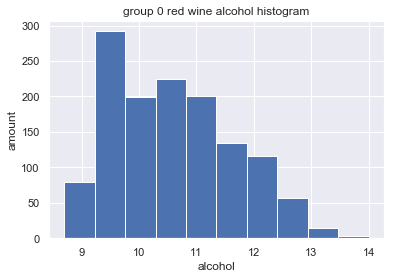

In [44]:
plt.title("group 0 red wine alcohol histogram")
plt.xlabel("alcohol")
plt.ylabel("amount")
plt.hist(redwine_clustering[three_group_red_cluster.labels_ == 0]["alcohol"])

(array([227., 164., 137., 107.,  60.,  38.,  14.,   1.,   7.,   2.]),
 array([ 9.  ,  9.59, 10.18, 10.77, 11.36, 11.95, 12.54, 13.13, 13.72,
        14.31, 14.9 ]),
 <a list of 10 Patch objects>)

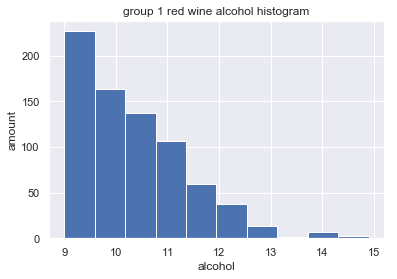

In [45]:
plt.title("group 1 red wine alcohol histogram")
plt.xlabel("alcohol")
plt.ylabel("amount")
plt.hist(redwine_clustering[three_group_red_cluster.labels_ == 1]["alcohol"])

(array([ 13., 189.,  90.,  35.,  13.,  15.,   6.,   3.,   9.,   3.]),
 array([ 8.5 ,  9.05,  9.6 , 10.15, 10.7 , 11.25, 11.8 , 12.35, 12.9 ,
        13.45, 14.  ]),
 <a list of 10 Patch objects>)

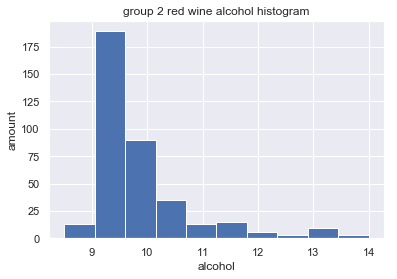

In [46]:
plt.title("group 2 red wine alcohol histogram")
plt.xlabel("alcohol")
plt.ylabel("amount")
plt.hist(redwine_clustering[three_group_red_cluster.labels_ == 2]["alcohol"])

In de bovenstaande grafieken is duidelijk te zien dat er in de groep 0 een veel groter aandeel van sterkere rode wijnen is. Ditzelfde is ook te zien bij de witte wijnen, waar groep 0 aanzienlijk minder sterkere wijnen bevat:

(array([  6., 337., 438., 236., 206., 154.,  69.,  49.,   9.,   1.]),
 array([ 8. ,  8.6,  9.2,  9.8, 10.4, 11. , 11.6, 12.2, 12.8, 13.4, 14. ]),
 <a list of 10 Patch objects>)

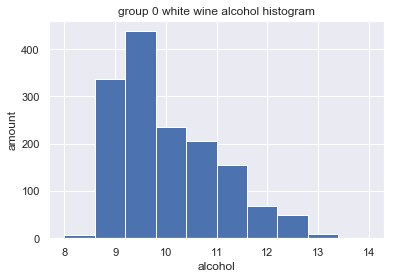

In [47]:
plt.title("group 0 white wine alcohol histogram")
plt.xlabel("alcohol")
plt.ylabel("amount")
plt.hist(whitewine_clustering[three_group_white_cluster.labels_ == 0]["alcohol"])

(array([ 90., 302., 267., 328., 277., 182., 195., 178.,  37.,  12.]),
 array([ 8.4 ,  8.98,  9.56, 10.14, 10.72, 11.3 , 11.88, 12.46, 13.04,
        13.62, 14.2 ]),
 <a list of 10 Patch objects>)

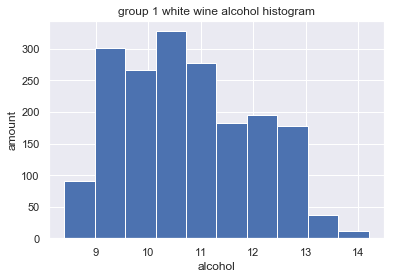

In [48]:
plt.title("group 1 white wine alcohol histogram")
plt.xlabel("alcohol")
plt.ylabel("amount")
plt.hist(whitewine_clustering[three_group_white_cluster.labels_ == 1]["alcohol"])

(array([  6., 101., 106., 160., 196., 171., 168., 146.,  46.,  16.]),
 array([ 8.4  ,  8.965,  9.53 , 10.095, 10.66 , 11.225, 11.79 , 12.355,
        12.92 , 13.485, 14.05 ]),
 <a list of 10 Patch objects>)

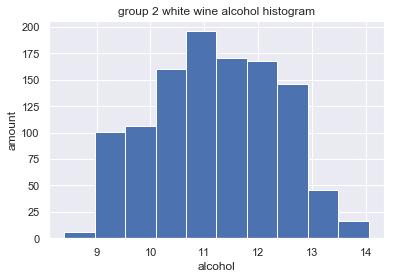

In [49]:
plt.title("group 2 white wine alcohol histogram")
plt.xlabel("alcohol")
plt.ylabel("amount")
plt.hist(whitewine_clustering[three_group_white_cluster.labels_ == 2]["alcohol"])

In [50]:
whitewine_clustering.groupby(three_group_white_cluster.labels_)["alcohol"].mean()

0     9.979502
1    10.747857
2    11.198865
Name: alcohol, dtype: float64

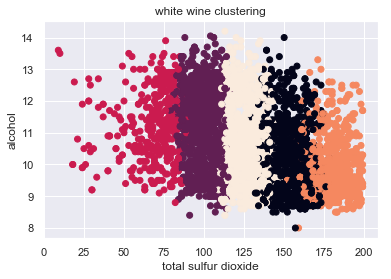

In [51]:
plt.title("white wine clustering")
plt.xlabel("total sulfur dioxide")
plt.ylabel("alcohol")
plt.scatter(whitewine_clustering["total sulfur dioxide"], whitewine_clustering["alcohol"], c=five_group_white_cluster.labels_)

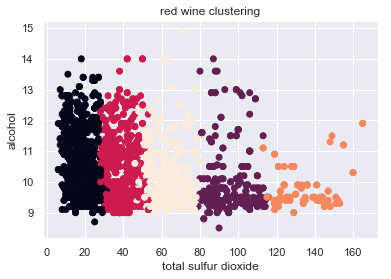

In [52]:
plt.title("red wine clustering")
plt.xlabel("total sulfur dioxide")
plt.ylabel("alcohol")
plt.scatter(redwine_clustering["total sulfur dioxide"], redwine_clustering["alcohol"], c=five_group_red_cluster.labels_)

De bovenstaande plots zijn interessant, want hierin is niet alleen nogmaals te zien dat witte wijn veel meer sulfur dioxide bevat, maar ook dat sterke rode wijnen vaak weinig sulfur dioxide bevatten, terwijl dit bij witte wijnen heel anders werkt.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


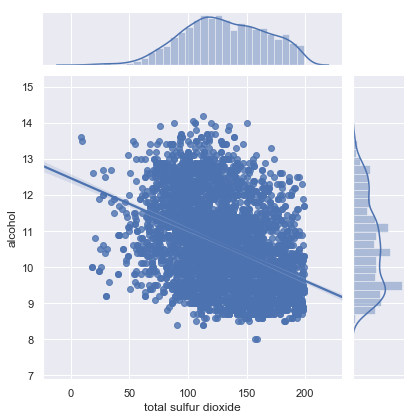

In [53]:
sns.jointplot(whitewine_clustering["total sulfur dioxide"], whitewine_clustering["alcohol"], kind="reg")

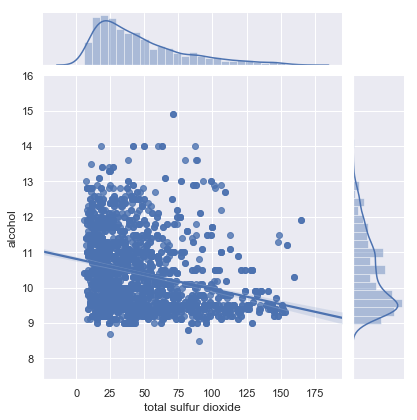

In [54]:
sns.jointplot(redwine_clustering["total sulfur dioxide"], redwine_clustering["alcohol"], kind="reg")

Voor de meeste wijnen is wel te zeggen dat een hoge hoeveelheid alcohol matig correleert met een lage hoeveelheid sulfur dioxide.
Dit is niet het geval voor de hoeveelheid free sulfur dioxide, zoals hieronder te zien is:

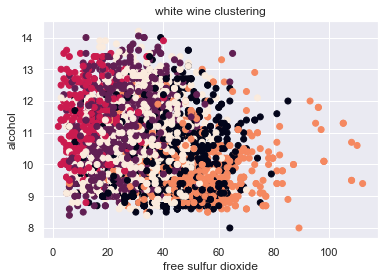

In [55]:
plt.title("white wine clustering")
plt.xlabel("free sulfur dioxide")
plt.ylabel("alcohol")
plt.scatter(whitewine_clustering["free sulfur dioxide"], whitewine_clustering["alcohol"], c=five_group_white_cluster.labels_)

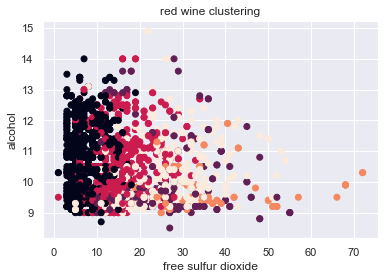

In [56]:
plt.title("red wine clustering")
plt.xlabel("free sulfur dioxide")
plt.ylabel("alcohol")
plt.scatter(redwine_clustering["free sulfur dioxide"], redwine_clustering["alcohol"], c=five_group_red_cluster.labels_)

Daarnaast valt het op de de groepen veel minder goed te onderscheiden zijn in deze plots, omdat de groepen dus voornamelijk gebaseerd zijn op de totale hoeveelheid sulfur dioxide.
Ook is er matige correlatie tussen een hoge hoeveelheid alcohol en een lage hoeveelheid totaal sulfur dioxide.

### Koppeling met wijnmakerijen

Als laatste onderdeel van deze onderzoeksvraag zal de terugkoppeling van de clusters naar de wijnmakerijen uitgevoerd worden.
Het is voor te stellen dat de clusters ook gedeeltelijk overeen komen met de wijnmakerijen, maar het kan ook zijn dat hier geen relatie in te ontdekken is. De wijnmakerij is alleen bekend bij de rode wijn dataset.

In [57]:
redwine_original_with_no_outliers = redwine[redwine["total sulfur dioxide"] < 250]
groups = redwine_original_with_no_outliers.groupby(five_group_red_cluster.labels_)["winery"]
groups.describe()

,count,unique,top,freq
0,900,226,Wines & Winemakers,30
1,272,135,DFJ Vinhos,13
2,691,202,Wines & Winemakers,29
3,127,81,Casa Santos Lima,7
4,462,184,DFJ Vinhos,19


In [58]:
for group in range(0, 5):
    print(f"CLUSTER {group}")
    print(groups.value_counts()[group].head())

CLUSTER 0
winery
Wines & Winemakers       30
Casa Santos Lima         26
Companhia das Quintas    25
Dão Sul                  25
DFJ Vinhos               23
Name: winery, dtype: int64
CLUSTER 1
winery
DFJ Vinhos            13
Casa Santos Lima      10
Wines & Winemakers     9
Casca Wines            8
Caves Velhas           7
Name: winery, dtype: int64
CLUSTER 2
winery
Wines & Winemakers       29
Casa Santos Lima         23
DFJ Vinhos               16
J, Portugal Ramos        15
Companhia das Quintas    13
Name: winery, dtype: int64
CLUSTER 3
winery
Casa Santos Lima          7
DFJ Vinhos                6
Quinta do Casal Branco    6
J, Portugal Ramos         4
José Maria da Fonseca     4
Name: winery, dtype: int64
CLUSTER 4
winery
DFJ Vinhos            19
Casa Santos Lima      16
J, Portugal Ramos     12
Wines & Winemakers    12
Herdade do Esporão    11
Name: winery, dtype: int64


### Conclusie

Als conclusie op het clusteren van de wijnen op basis van de stoffen en andere chemische eigenschappen zou er gezegd kunnen worden dat rode wijnen vaak minder sulfur dioxide bevatten.
Daarnaast is er een matige correlatie tussen enkele stoffen te ontdekken, waarop het kmeans algoritme de groepen indeeld.

Vervolgens is er nog onderzoek gedaan naar de relatie van de clusters met de wijnmakerijen. Hier zijn een aantal verbanden in te vinden, voornamelijk de verhouding van wijnen per cluster van "Wines & Winemakers" t.o.v. "DFJ Vinhos" is interessant.

Hiermee is onderzoeksvraag 2 beantwoord.